Membaca Data

In [238]:
import pandas as pd
var = ['id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 
       'Duration', 'Purpose', 'Risk']

df = pd.read_csv("german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


Melihat Informasi Attribut

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


Menghitung Data null

In [240]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

Melihat statistik pada dataframe

In [241]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,35.546,11.375469,19.0,27.00,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.00,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.50,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.00,18.0,24.00,72.0


Melihat banyaknya data kelas

In [242]:
df.groupby("Risk").count()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
Risk,,,,,,,,,,
bad,300,300,300,300,300,268,254,300,300,300
good,700,700,700,700,700,549,352,700,700,700


Melihat data kelas berdasarkan Kelamin

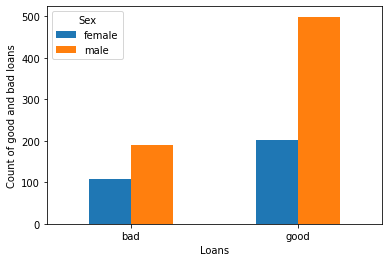

In [243]:
import matplotlib.pyplot as plt

pd.crosstab(df["Risk"], df["Sex"]).plot.bar(rot=0)
plt.xlabel("Loans")
plt.ylabel("Count of good and bad loans")
plt.show()

Membuang Kolom yang tidak diperlukan

In [244]:
# Dibuang karena hanya berupa ID data dan tidak berpengaruh pada proses klasifikasi
df.drop(columns="Unnamed: 0", inplace=True)

In [245]:
# Dibuang karena jumlah null melebihi 30% dan jika di imputasi dapat menurunkan hasil klasifikasi
df.drop(columns="Checking account", inplace=True)

Mengisi data null

In [246]:
# mengisi data kosong dengan data yang sering muncul yaitu "little"
df["Saving accounts"] = df["Saving accounts"].fillna(df["Saving accounts"].mode()[0])

Melihat data Hasil Preprocessing

In [247]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,1169,6,radio/TV,good
1,22,female,2,own,little,5951,48,radio/TV,bad
2,49,male,1,own,little,2096,12,education,good
3,45,male,2,free,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,4870,24,car,bad


In [248]:
df.groupby("Risk").count()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
Risk,,,,,,,,
bad,300,300,300,300,300,300,300,300
good,700,700,700,700,700,700,700,700


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              1000 non-null   int64 
 1   Sex              1000 non-null   object
 2   Job              1000 non-null   int64 
 3   Housing          1000 non-null   object
 4   Saving accounts  1000 non-null   object
 5   Credit amount    1000 non-null   int64 
 6   Duration         1000 non-null   int64 
 7   Purpose          1000 non-null   object
 8   Risk             1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


Normalisasi Data

In [250]:
from sklearn.preprocessing import LabelEncoder

new_df = df #Membuat dataframe baru agar tidak mengganggu data asli, jika diperlukan
le = LabelEncoder()
categorical = ["Sex","Housing","Saving accounts","Purpose","Risk"]

for cat in categorical:
    lblCat = le.fit_transform(df[cat])
    new_df[cat] = lblCat
    
new_df.head()


,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,1169,6,5,1
1,22,0,2,1,0,5951,48,5,0
2,49,1,1,1,0,2096,12,3,1
3,45,1,2,0,0,7882,42,4,1
4,53,1,2,0,0,4870,24,1,0


In [251]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              1000 non-null   int64
 1   Sex              1000 non-null   int32
 2   Job              1000 non-null   int64
 3   Housing          1000 non-null   int32
 4   Saving accounts  1000 non-null   int32
 5   Credit amount    1000 non-null   int64
 6   Duration         1000 non-null   int64
 7   Purpose          1000 non-null   int32
 8   Risk             1000 non-null   int32
dtypes: int32(5), int64(4)
memory usage: 50.9 KB


Membuat data kelas menjadi balance menggunakan SMOTE

In [252]:
x = new_df[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Credit amount',
        'Duration', 'Purpose']]
y = new_df['Risk']

from imblearn.over_sampling import SMOTE
x_resampled, y_resampled = SMOTE(random_state=42).fit_resample(x,y)

Melihat Hasil balancing

In [253]:
import numpy as np
print("Banyak data kelas 0 (bad) : ",np.count_nonzero(y_resampled == 0))
print("Banyak data kelas 1 (good): ",np.count_nonzero(y_resampled == 1))

Banyak data kelas 0 (bad) :  700
Banyak data kelas 1 (good):  700


Melihat data kelas berdasarkan Kelamin

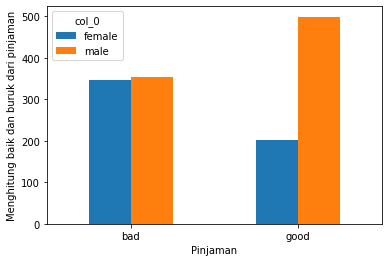

In [254]:
enc = LabelEncoder()
enc.fit(["female","male"])

pd.crosstab(le.inverse_transform(y_resampled), 
            enc.inverse_transform(x_resampled["Sex"])).plot.bar(rot=0)
plt.xlabel("Pinjaman")
plt.ylabel("Menghitung baik dan buruk dari pinjaman")
plt.show()


Spliting data menggunakan stratified random sampling

In [255]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, 
                                                    random_state=42, stratify=y_resampled)

print("Data Train")
print("Banyak data kelas 0 (bad) : ",np.count_nonzero(y_train == 0))
print("Banyak data kelas 1 (good): ",np.count_nonzero(y_train == 1))

print("\nData Test")
print("Banyak data kelas 0 (bad) : ",np.count_nonzero(y_test == 0))
print("Banyak data kelas 1 (good): ",np.count_nonzero(y_test == 1))

Data Train
Banyak data kelas 0 (bad) :  560
Banyak data kelas 1 (good):  560

Data Test
Banyak data kelas 0 (bad) :  140
Banyak data kelas 1 (good):  140


# Proses Klasifikasi

## Random Forest

In [256]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import time


#Random Forest
from sklearn.ensemble import RandomForestClassifier

awal = time.time()
#Membuat model klasifikasi
modelRFC = RandomForestClassifier(n_estimators=100, #Default
                                  max_depth=15,
                                  min_samples_leaf=1, #Default
                                  min_samples_split=2, #Default
                                  random_state=42)

#Melatih model menggunakan training dataset 
modelRFC.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, random_state=42)

Check model overfitting/underfitting/optimal

In [257]:
accuracyScoreTrain = cross_val_score(modelRFC, X_train, y_train, cv=6)
accuracyScoreTest = cross_val_score(modelRFC, X_test, y_test, cv=6)

print("Accuracy cross-validation Train : \n",accuracyScoreTrain, "Mean : ", np.mean(accuracyScoreTrain))
print("\nAccuracy cross-validation Test : \n",accuracyScoreTest, "Mean : ", np.mean(accuracyScoreTest))

Accuracy cross-validation Train : 
 [0.72727273 0.73262032 0.77540107 0.73262032 0.76344086 0.72580645] Mean :  0.7428602917217718

Accuracy cross-validation Test : 
 [0.65957447 0.65957447 0.57446809 0.76595745 0.7173913  0.69565217] Mean :  0.6787696577243293


Proses prediksi Klasifikasi 

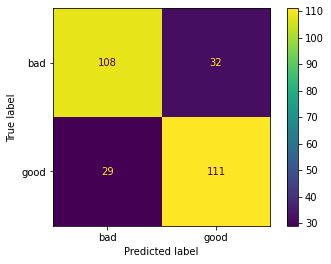


 Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       140
           1       0.78      0.79      0.78       140

    accuracy                           0.78       280
   macro avg       0.78      0.78      0.78       280
weighted avg       0.78      0.78      0.78       280

Total Waktu Proses  5.281570196151733  Detik.


In [258]:
#Memprediksi hasil dari test dataset
predictionsRfc = modelRFC.predict(X_test)

#Menampilkan Hasil
cm = confusion_matrix(y_test, predictionsRfc, labels=modelRFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=le.inverse_transform(modelRFC.classes_))
disp.plot()
plt.show()

print ("\n Classification report : \n",classification_report(y_test,predictionsRfc))
akhir = time.time()
print ("Total Waktu Proses ", akhir- awal, " Detik.")

# AdaBoost (Adaptive boost)

In [259]:
#Adaboost with Decision tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

awal = time.time()
#Membuat model klasifikasi
modelAB = AdaBoostClassifier(base_estimator=
                             DecisionTreeClassifier(max_depth=10, 
                                                    min_samples_leaf=1, #Default
                                                    min_samples_split=13),
                            learning_rate=1, #Default
                            n_estimators=350,
                            random_state=42)

#Melatih model menggunakan training dataset 
modelAB.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         min_samples_split=13),
                   learning_rate=1, n_estimators=350, random_state=42)

Check model overfitting/underfitting/optimal

In [260]:
accuracyScoreTrain = cross_val_score(modelAB, X_train, y_train, cv=6)
accuracyScoreTest = cross_val_score(modelAB, X_test, y_test, cv=6)

print("Accuracy cross-validation Train : \n",accuracyScoreTrain, "Mean : ", np.mean(accuracyScoreTrain))
print("\nAccuracy cross-validation Test : \n",accuracyScoreTest, "Mean : ", np.mean(accuracyScoreTest))

Accuracy cross-validation Train : 
 [0.73796791 0.72727273 0.78609626 0.82352941 0.73655914 0.7311828 ] Mean :  0.7571013742740499

Accuracy cross-validation Test : 
 [0.59574468 0.63829787 0.63829787 0.72340426 0.7173913  0.73913043] Mean :  0.6753777366635831


Proses prediksi Klasifikasi 

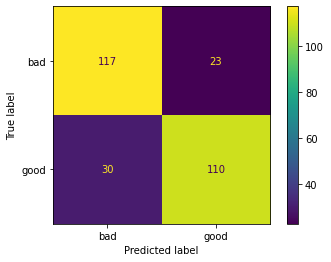


 Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       140
           1       0.83      0.79      0.81       140

    accuracy                           0.81       280
   macro avg       0.81      0.81      0.81       280
weighted avg       0.81      0.81      0.81       280

Total Waktu Proses  24.373554468154907  Detik.


In [261]:
#Memprediksi hasil dari test dataset
predictionsAB = modelAB.predict(X_test)

#Menampilkan Hasil
cm = confusion_matrix(y_test, predictionsAB, labels=modelAB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=le.inverse_transform(modelAB.classes_))
disp.plot()
plt.show()

print ("\n Classification report : \n",classification_report(y_test,predictionsAB))
akhir = time.time()
print ("Total Waktu Proses ", akhir- awal, " Detik.")